In [12]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [13]:
num_scen = 3

In [14]:
f = pd.read_csv(f"C:\\study material\\CS F266\\Hanoi_CMH\\Scenario-2\\Demands\\Node_1.csv")

In [15]:
print(f.isna().sum())

Index    0
Value    0
dtype: int64


In [16]:
# Initialize the DataFrame to store the combined data
combined_data_final = pd.DataFrame()

# Loop through each scenario
for k in range(1,num_scen):
    # Initialize DataFrame to store data for the current scenario
    combined_data = pd.DataFrame()
    
    # Read timestamps data
    sf = pd.read_csv(f"C:\\study material\\CS F266\\Hanoi_CMH\\Scenario-{k}\\Timestamps.csv")
    combined_data['Timestamp'] = sf['Timestamp'].tolist()
    
    # Read demands data for nodes
    for i in range(1, 33):
        df1 = pd.read_csv(f"C:\\study material\\CS F266\\Hanoi_CMH\\Scenario-{k}\\Demands\\Node_{i}.csv")
        combined_data[f"D_node-{i}"] = df1['Value'].tolist()
    
    # Read pressures data for nodes
    for y in range(1, 33):
        df2 = pd.read_csv(f"C:\\study material\\CS F266\\Hanoi_CMH\\Scenario-{k}\\Pressures\\Node_{y}.csv")
        combined_data[f"P_node-{y}"] = df2['Value'].tolist()
    
    # Read flows data for links
    for z in range(1, 35):
        df3 = pd.read_csv(f"C:\\study material\\CS F266\\Hanoi_CMH\\Scenario-{k}\\Flows\\Link_{z}.csv")
        combined_data[f"F_node-{z}"] = df3['Value'].tolist()
    
#     # Read leakage data for nodes
#     for x in range(1, 35):
#         file_path = f"C:\\study material\\CS F266\\Hanoi_CMH\\Scenario-{k}\\Leaks\\Leak_{x}_demand.csv"
#         if os.path.exists(file_path):
#             df4 = pd.read_csv(file_path)
#             combined_data[f"Leak_node-{x}"] = df4['Value'].tolist()
#         else:
#             empty_list = [0] * 17520  # Assuming 17520 values for each scenario
#             combined_data[f"Leak_node-{x}"] = empty_list
    
    # Concatenate data for the current scenario with the final combined data
    combined_data_final = pd.concat([combined_data_final, combined_data], ignore_index=True)


In [17]:
combined_data_final.shape


(35040, 99)

In [18]:
combined_data_final.isna().sum()

Timestamp    0
D_node-1     0
D_node-2     0
D_node-3     0
D_node-4     0
            ..
F_node-30    0
F_node-31    0
F_node-32    0
F_node-33    0
F_node-34    0
Length: 99, dtype: int64

In [19]:
new_columns = pd.DataFrame(0, index=combined_data_final.index, columns=[f"Leak_node-{i}" for i in range(1, 35)])

# Concatenate new_columns DataFrame to the original dataset
combined_data_final = pd.concat([combined_data_final, new_columns], axis=1)

In [20]:
combined_data_final.isna().sum()

Timestamp       0
D_node-1        0
D_node-2        0
D_node-3        0
D_node-4        0
               ..
Leak_node-30    0
Leak_node-31    0
Leak_node-32    0
Leak_node-33    0
Leak_node-34    0
Length: 133, dtype: int64

In [21]:
combined_data_final.shape

(35040, 133)

In [22]:
df4['Value']

NameError: name 'df4' is not defined

In [23]:
import os

# Initialize the DataFrame to store the combined data
combined_data_final = pd.DataFrame()

# Initialize DataFrame to store leak data
leak_data_final = pd.DataFrame()

# Loop through each scenario
for k in range(1, num_scen):
    # Initialize DataFrame to store data for the current scenario
    combined_data = pd.DataFrame()
    
    # Read timestamps data
    sf = pd.read_csv(f"C:\\study material\\CS F266\\Hanoi_CMH\\Scenario-{k}\\Timestamps.csv")
    combined_data['Timestamp'] = sf['Timestamp'].tolist()
    
    # Read demands data for nodes
    for i in range(1, 33):
        df1 = pd.read_csv(f"C:\\study material\\CS F266\\Hanoi_CMH\\Scenario-{k}\\Demands\\Node_{i}.csv")
        combined_data[f"D_node-{i}"] = df1['Value'].tolist()
    
    # Read pressures data for nodes
    for y in range(1, 33):
        df2 = pd.read_csv(f"C:\\study material\\CS F266\\Hanoi_CMH\\Scenario-{k}\\Pressures\\Node_{y}.csv")
        combined_data[f"P_node-{y}"] = df2['Value'].tolist()
    
    # Read flows data for links
    for z in range(1, 35):
        df3 = pd.read_csv(f"C:\\study material\\CS F266\\Hanoi_CMH\\Scenario-{k}\\Flows\\Link_{z}.csv")
        combined_data[f"F_node-{z}"] = df3['Value'].tolist()
    
    # Concatenate data for the current scenario with the final combined data
    combined_data_final = pd.concat([combined_data_final, combined_data], ignore_index=True)

    # Iterate over each possible leak column
    scenario_leak_data = pd.DataFrame()
    for x in range(1, 35):
        leak_df = pd.DataFrame()
        file_path = f"C:\\study material\\CS F266\\Hanoi_CMH\\Scenario-{k}\\Leaks\\Leak_{x}_demand.csv"
        if os.path.exists(file_path):
            leak_df['Leak_node'] = pd.read_csv(file_path)['Value'].tolist()
        else:
            leak_df['Leak_node'] = [0] * len(combined_data)  # Fill with zeros if file not found
        scenario_leak_data[f'Leak_node-{x}'] = leak_df['Leak_node']

    # Concatenate leak data for the current scenario with the final leak data
    leak_data_final = pd.concat([leak_data_final, scenario_leak_data], ignore_index=True)

# Join leak data with combined data
combined_data_final = pd.concat([combined_data_final, leak_data_final], axis=1)


In [24]:
combined_data_final.head()

,Timestamp,D_node-1,D_node-2,D_node-3,D_node-4,D_node-5,D_node-6,D_node-7,D_node-8,D_node-9,...,Leak_node-25,Leak_node-26,Leak_node-27,Leak_node-28,Leak_node-29,Leak_node-30,Leak_node-31,Leak_node-32,Leak_node-33,Leak_node-34
0,2017-01-01 00:00:00,-3337.2,151.2,140.4,21.6,104.4,169.2,219.6,86.4,90.0,...,0,0,0,0,0,0,0,0,0,0
1,2017-01-01 00:30:00,-2973.6,136.8,122.4,18.0,100.8,154.8,230.4,79.2,72.0,...,0,0,0,0,0,0,0,0,0,0
2,2017-01-01 01:00:00,-2584.8,118.8,100.8,18.0,82.8,140.4,194.4,64.8,72.0,...,0,0,0,0,0,0,0,0,0,0
3,2017-01-01 01:30:00,-2419.2,108.0,93.6,14.4,75.6,144.0,176.4,57.6,61.2,...,0,0,0,0,0,0,0,0,0,0
4,2017-01-01 02:00:00,-2196.0,100.8,82.8,14.4,72.0,133.2,147.6,54.0,61.2,...,0,0,0,0,0,0,0,0,0,0


In [25]:
combined_data_final.shape

(35040, 133)

In [26]:
combined_data_final.isna().sum()

Timestamp       0
D_node-1        0
D_node-2        0
D_node-3        0
D_node-4        0
               ..
Leak_node-30    0
Leak_node-31    0
Leak_node-32    0
Leak_node-33    0
Leak_node-34    0
Length: 133, dtype: int64

In [27]:
print(combined_data_final['Leak_node-25'].head(100))

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Name: Leak_node-25, Length: 100, dtype: int64


In [28]:
# combined_data_final['Leak_node-25'].isna().sum()


In [29]:
print(combined_data_final.isna().sum())

Timestamp       0
D_node-1        0
D_node-2        0
D_node-3        0
D_node-4        0
               ..
Leak_node-30    0
Leak_node-31    0
Leak_node-32    0
Leak_node-33    0
Leak_node-34    0
Length: 133, dtype: int64


In [30]:
for col in combined_data_final.columns:
    print(col)

Timestamp
D_node-1
D_node-2
D_node-3
D_node-4
D_node-5
D_node-6
D_node-7
D_node-8
D_node-9
D_node-10
D_node-11
D_node-12
D_node-13
D_node-14
D_node-15
D_node-16
D_node-17
D_node-18
D_node-19
D_node-20
D_node-21
D_node-22
D_node-23
D_node-24
D_node-25
D_node-26
D_node-27
D_node-28
D_node-29
D_node-30
D_node-31
D_node-32
P_node-1
P_node-2
P_node-3
P_node-4
P_node-5
P_node-6
P_node-7
P_node-8
P_node-9
P_node-10
P_node-11
P_node-12
P_node-13
P_node-14
P_node-15
P_node-16
P_node-17
P_node-18
P_node-19
P_node-20
P_node-21
P_node-22
P_node-23
P_node-24
P_node-25
P_node-26
P_node-27
P_node-28
P_node-29
P_node-30
P_node-31
P_node-32
F_node-1
F_node-2
F_node-3
F_node-4
F_node-5
F_node-6
F_node-7
F_node-8
F_node-9
F_node-10
F_node-11
F_node-12
F_node-13
F_node-14
F_node-15
F_node-16
F_node-17
F_node-18
F_node-19
F_node-20
F_node-21
F_node-22
F_node-23
F_node-24
F_node-25
F_node-26
F_node-27
F_node-28
F_node-29
F_node-30
F_node-31
F_node-32
F_node-33
F_node-34
Leak_node-1
Leak_node-2
Leak_node-3
L

In [31]:
# View the first few rows of the combined dataset
print("First few rows of the combined dataset:")
print(combined_data_final.head())


First few rows of the combined dataset:
             Timestamp  D_node-1  D_node-2  D_node-3  D_node-4  D_node-5  \
0  2017-01-01 00:00:00   -3337.2     151.2     140.4      21.6     104.4   
1  2017-01-01 00:30:00   -2973.6     136.8     122.4      18.0     100.8   
2  2017-01-01 01:00:00   -2584.8     118.8     100.8      18.0      82.8   
3  2017-01-01 01:30:00   -2419.2     108.0      93.6      14.4      75.6   
4  2017-01-01 02:00:00   -2196.0     100.8      82.8      14.4      72.0   

   D_node-6  D_node-7  D_node-8  D_node-9  ...  Leak_node-25  Leak_node-26  \
0     169.2     219.6      86.4      90.0  ...             0             0   
1     154.8     230.4      79.2      72.0  ...             0             0   
2     140.4     194.4      64.8      72.0  ...             0             0   
3     144.0     176.4      57.6      61.2  ...             0             0   
4     133.2     147.6      54.0      61.2  ...             0             0   

   Leak_node-27  Leak_node-28  Lea

In [32]:
# Load data from combined_data_final DataFrame
# Assuming 'Timestamp' column is not needed for modeling
X = combined_data_final.drop(columns=['Timestamp']).values

# Determine the target variable: whether there is any leakage in any node
y = (combined_data_final.filter(like='Leak_node-') > 0).any(axis=1).astype(int)

In [33]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
# Reshape data for CNN
X_reshaped = np.expand_dims(X_scaled, axis=2)

In [35]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_reshaped.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [36]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
# Define the number of folds for cross-validation
n_splits = 5

# Initialize lists to store training and validation errors for each fold
train_errors = []
val_errors = []

# Initialize KFold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True)

In [38]:
# Reshape data for CNN
X_reshaped = np.expand_dims(X_scaled, axis=2)

In [39]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_reshaped.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [40]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
# Define the number of folds for cross-validation
n_splits = 5

# Initialize lists to store training and validation errors for each fold
train_errors = []
val_errors = []

# Initialize KFold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True)

In [45]:
# Loop through each fold
for train_index, val_index in kf.split(X_reshaped):
    # Split the data into training and validation sets for this fold
    X_train, X_val = X_reshaped[train_index], X_reshaped[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Train the model and record training/validation errors for each epoch
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)
    
    # Append training and validation errors to the lists
    train_errors.append(history.history['loss'])
    val_errors.append(history.history['val_loss'])

In [46]:
# Calculate average training and validation errors across all folds
avg_train_errors = np.mean(train_errors, axis=0)
avg_val_errors = np.mean(val_errors, axis=0)

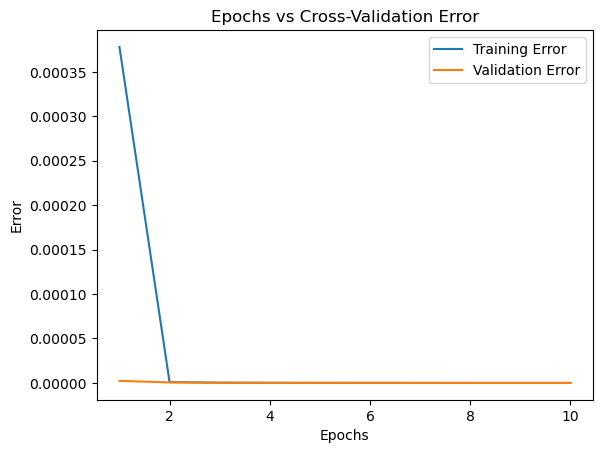

In [47]:
# Plot epochs vs cross-validation error curve
plt.plot(range(1, len(avg_train_errors) + 1), avg_train_errors, label='Training Error')
plt.plot(range(1, len(avg_val_errors) + 1), avg_val_errors, label='Validation Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs Cross-Validation Error')
plt.legend()
plt.show()